In [1]:
import math

# Assigment 1 forwad pass and backpropagation without using any library

x = [1,-1]
t = [1,0]

w = [[1,1,1],[-1,-1,-1]]
b = [0,0,0]

v = [[1,1],[-1,-1],[-1,-1]]
c = [0,0]

## Forward pass

In [2]:


print(f"x: {x}")

# first layer
print(f"W: {w}")

k = [sum([x[i]*w[i][j] for i in range(len(x))]) + b[j] for j in range(len(b))]

print(f"k: {k}")

# sigmoid layer
z = [1/(1+math.exp(-k[i])) for i in range(len(k))]

print(f"z: {z}")

# second layer
print(f"V: {v}")

o = [sum([z[i]*v[i][j] for i in range(len(z))]) + c[j] for j in range(len(c))]

print(f"o: {o}")

# softmax layer
y = [math.exp(o[i])/sum([math.exp(o[j]) for j in range(len(o))]) for i in range(len(o))]

print(f"y: {y}")

# cross entropy loss
loss = -sum([t[i]*math.log(y[i]) for i in range(len(t))])

print(f"loss: {loss}")


x: [1, -1]
W: [[1, 1, 1], [-1, -1, -1]]
k: [2, 2, 2]
z: [0.8807970779778823, 0.8807970779778823, 0.8807970779778823]
V: [[1, 1], [-1, -1], [-1, -1]]
o: [-0.8807970779778823, -0.8807970779778823]
y: [0.5, 0.5]
loss: 0.6931471805599453


## Backward pass

In [3]:
# derivative of loss function with respect to yi
dy = [(-1/y[i])*t[i] for i in range(len(y))]

print(f"dy: {dy}")

# derivative of loss function with respect to oi
do = [sum([dy[j] * (y[i]*(1-y[i]) if j==i else -y[j]*y[i]) for j in range(len(dy))]) for i in range(len(o))]

# alternative way to calculate do
#index of true class
i_true = t.index(1)
do_alt = [dy[i_true]  * (y[i]*(1-y[i]) if i==i_true else -y[i_true]*y[i]) for i in range(len(o))]

assert do == do_alt


print(f"do: {do}")

# derivative of loss function with respect to v
dv = [[do[j]*z[i] for j in range(len(do))] for i in range(len(z))]

print(f"dv: {dv}")

# derivative of loss function with respect to ci
dc = [do[i]  for i in range(len(c))]

print(f"dc: {dc}")

# derivative of loss function with respect to zi
dz = [sum([do[j]*v[i][j] for j in range(len(do))]) for i in range(len(v))]

print(f"dz: {dz}")

# derivative of loss function with respect to ki
dk = [dz[i]*z[i]*(1-z[i]) for i in range(len(z))]

print(f"dk: {dk}")

# derivative of loss function with respect to wi
dw = [[dk[j]*x[i] for j in range(len(dk))] for i in range(len(x))]

print(f"dw: {dw}")

# derivative of loss function with respect to bi
db = [dk[i] for i in range(len(b))]

print(f"db: {db}")

dy: [-2.0, -0.0]
do: [-0.5, 0.5]
dv: [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]]
dc: [-0.5, 0.5]
dz: [0.0, 0.0, 0.0]
dk: [0.0, 0.0, 0.0]
dw: [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]]
db: [0.0, 0.0, 0.0]


In [ ]:
import math

import random

class SimpleNeuralNetwork:
    def __init__(self, w, b, v, c):
        # Initialize weights and biases
        self.w = w
        self.b = b
        self.v = v
        self.c = c
    

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def forward_pass(self, x):
        # First layer
        k = [sum(x[i] * self.w[i][j] for i in range(len(x))) + self.b[j] for j in range(len(self.b))]
        # Sigmoid layer
        z = [self.sigmoid(k[i]) for i in range(len(k))]
        # Second layer
        o = [sum(z[i] * self.v[i][j] for i in range(len(z))) + self.c[j] for j in range(len(self.c))]
        # Softmax layer
        y = [math.exp(o[i]) / sum(math.exp(o[j]) for j in range(len(o))) for i in range(len(o))]
        return y, z, k, o

    def compute_loss(self, y, t):
        return -sum(t[i] * math.log(y[i]) for i in range(len(t)))

    def backward_pass(self,t, y, o, z, x):
        # Derivatives of the loss function
        # derivative of loss function with respect to yi
        dy = [(-t[i] / y[i]) for i in range(len(y))]

        # derivative of loss function with respect to oi
        do = [sum([dy[j] * (y[j]*(1-y[j]) if j==i else -y[j]*y[i]) for j in range(len(dy))]) for i in range(len(o))]
        #do = [dy[j] * (y[j]*(1-y[j]))  for j in range(len(dy))]) for i in range(len(o))]

        # derivative of loss function with respect to v
        dv = [[do[j]*z[i] for j in range(len(do))] for i in range(len(z))]

        # derivative of loss function with respect to ci
        dc = [do[i]  for i in range(len(c))]

        # derivative of loss function with respect to zi
        dz = [sum([do[j]*self.v[i][j] for j in range(len(do))]) for i in range(len(self.v))]

        # derivative of loss function with respect to ki
        dk = [dz[i]*z[i]*(1-z[i]) for i in range(len(z))]

        # derivative of loss function with respect to wi
        dw = [[dk[j]*x[i] for j in range(len(dk))] for i in range(len(x))]

        # derivative of loss function with respect to bi
        db = [dk[i] for i in range(len(b))]

        return dw, db, dc, dv
    def update_weights(self, dw, db,dc, dv, learning_rate=0.1):
        # Update the weights and biases using the learning rate
        for i in range(len(self.w)):
            for j in range(len(self.w[i])):
                self.w[i][j] -= learning_rate * dw[i][j]
        
        for i in range(len(self.b)):
            self.b[i] -= learning_rate * db[i]

        for i in range(len(self.v)):
            for j in range(len(self.v[i])):
                self.v[i][j] -= learning_rate * dv[i][j]

        for i in range(len(self.c)):
            self.c[i] -= learning_rate * dc[i]

    def train(self, xtrain, ytrain, epochs, learning_rate=0.1):

        epochs_loss = []
        for epoch in range(epochs):

            data_points_loss = []
            total_loss = 0

           

           

            random.seed(epoch)    

            data = list(zip(xtrain, ytrain))

            random.shuffle(data)
            

            for index,(x, t) in enumerate(data):
                y, z, k, o = self.forward_pass(x)
                loss = self.compute_loss(y, t)
                dw, db, dc, dv = self.backward_pass(t, y, o, z, x)
                # if is first run print derivative
                if epoch == 0 and index == 0:
                    print(f"dw: {dw}")
                    print(f"db: {db}")
                    print(f"dc: {dc}")
                    print(f"dv: {dv}")
                self.update_weights(dw, db, dc, dv, learning_rate=learning_rate)
                total_loss += loss
                data_points_loss.append(loss)
            avg_loss = total_loss / len(xtrain)
            print(f"Epoch {epoch + 1}, Average Loss: {avg_loss}")

            epochs_loss.append(data_points_loss)
        return epochs_loss
            
    def validate(self, xval, yval):
        total_loss = 0
        correct_predictions = 0
        for x, t in zip(xval, yval):
            y, _, _, _ = self.forward_pass(x)

            # Predicted class is the one with the highest probability
            predicted_class = y.index(max(y))

            # Actual class is the one with the highest value in the target vector
            actual_class = t.index(max(t))

            # Increment correct predictions if the classes match
            if predicted_class == actual_class:
                correct_predictions += 1

            loss = self.compute_loss(y, t)
            total_loss += loss

        avg_loss = total_loss / len(xval)
        accuracy = correct_predictions / len(xval)
        return avg_loss, accuracy

# Example usage
x = [[1, -1], [-1, 1]]
t = [[1, 0], [0, 1]]
w = [[1, 1, 1], [-1, -1, -1]]
b = [0, 0, 0]
v = [[1, 1], [-1, -1], [-1, -1]]
c = [0, 0]
nn = SimpleNeuralNetwork(w, b, v, c)
nn.train(x, t, 100)



dw: [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]]
db: [0.0, 0.0, 0.0]
dc: [-0.5, 0.5]
dv: [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]]
Epoch 1, Average Loss: 0.7271016556975978
Epoch 2, Average Loss: 0.6835274081211195
Epoch 3, Average Loss: 0.645601912311061
Epoch 4, Average Loss: 0.6148431152281791
Epoch 5, Average Loss: 0.5888735264653224
Epoch 6, Average Loss: 0.5656127970464688
Epoch 7, Average Loss: 0.5466399082934634
Epoch 8, Average Loss: 0.5270585686182726
Epoch 9, Average Loss: 0.5105030545779687
Epoch 10, Average Loss: 0.49327300816472
Epoch 11, Average Loss: 0.4783529045970747
Epoch 12, Average Loss: 0.4628384069473046
Epoch 13, Average Loss: 0.4487725794384849
Epoch 14, Average Loss: 0.43525527826339905
Epoch 15, Average Loss: 0.42262030405719325
Epoch 16, Average Loss: 0.40994564504277897
Epoch 17, Average Loss: 0.3975108867557634
Epoch 18, Average Loss: 0.3860147055907514
Epoch 19, Average

[[0.6931471805599453, 0.7610561308352504],
 [0.7033764097176491, 0.6636784065245898],
 [0.7146228736993531, 0.576580950922769],
 [0.7189819683692906, 0.5107042620870677],
 [0.7178659989740392, 0.45988105395660556],
 [0.3760656095361597, 0.755159984556778],
 [0.6978013673185846, 0.39547844926834236],
 [0.3292041515452852, 0.7249129856912601],
 [0.6705326730348442, 0.35047343612109316],
 [0.2958064627834894, 0.6907395535459506],
 [0.6397600580873689, 0.31694575110678047],
 [0.27049756536503883, 0.6551792485295704],
 [0.26222216217452693, 0.635322996702443],
 [0.25440779656651175, 0.6161027599602863],
 [0.5726134619675126, 0.2726271461468739],
 [0.5593641855897121, 0.26052710449584576],
 [0.2269170192128635, 0.5681047542986633],
 [0.22148028015138932, 0.5505491310301135],
 [0.5135816012278311, 0.23687364863880872],
 [0.501138680472211, 0.22783844143248183],
 [0.48876766869853494, 0.2196072347750812],
 [0.476541825132386, 0.2120529493065041],
 [0.4645167606453955, 0.20507464065459494],
 [0

In [5]:
# print weights and biases of the network
print(f"w: {nn.w}")
print(f"b: {nn.b}")
print(f"v: {nn.v}")
print(f"c: {nn.c}")

w: [[1.3190182013711846, 1.3190182013711844, 1.3190182013711844], [-1.3190182013711846, -1.3190182013711844, -1.3190182013711844]]
b: [-0.10298842004189201, -0.10298842004189197, -0.10298842004189197]
v: [[1.9765982502944903, 0.0234017497055101], [-0.023401749705510136, -1.9765982502944905], [-0.023401749705510136, -1.9765982502944905]]
c: [-1.2382454716823024, 1.238245471682302]


## Training over synth data

In [4]:
from data import load_synth

# Load the synthetic dataset
(xtrain, ytrain), (xval, yval), num_cls = load_synth()


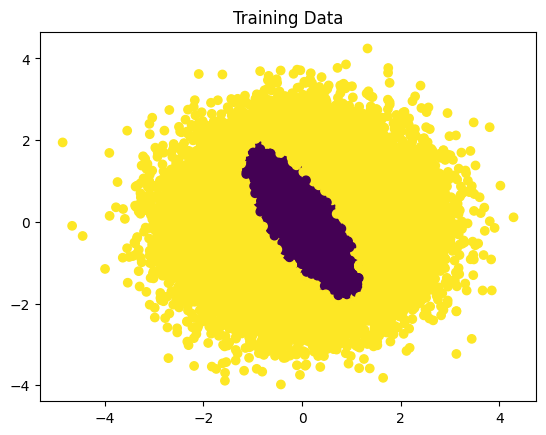

In [8]:
#plot the data
import matplotlib.pyplot as plt

plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain)
plt.title("Training Data")
plt.show()


In [34]:
xtrain

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       ...,
       [-1.48486162,  0.46215981],
       [ 1.54902516,  2.53170549],
       [-0.03572203,  0.17320019]])

### Removing outliers
(I don't apply this function in the end)

In [9]:
import numpy as np

def remove_data_points_with_outliers(data, target):
    # Convert the data to a NumPy array for easier manipulation
    data_array = np.array(data)
    target_array = np.array(target)

    #data_array = data

    # Calculate the first and third quartiles and IQR for each feature
    Q1 = np.percentile(data_array, 15, axis=0)
    Q3 = np.percentile(data_array, 85, axis=0)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify rows that do not contain outliers in any feature
    non_outlier_rows = ~((data_array < lower_bound) | (data_array > upper_bound)).any(axis=1)

    # Filter and return the data
    filtered_data = data_array[non_outlier_rows]
    filtered_target = target_array[non_outlier_rows]

    # print the number of removed rows
    print(f"Number of removed rows: {len(data_array) - len(filtered_data)}")

    return filtered_data, filtered_target



In [36]:
xtrain_filtered, ytrain_filtered = remove_data_points_with_outliers(xtrain, ytrain)

Number of removed rows: 5


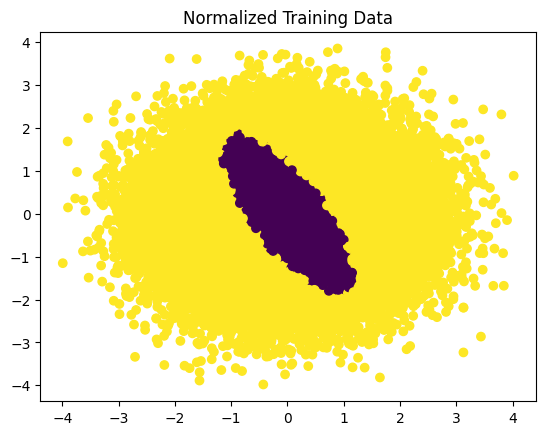

In [37]:
# plot the filtered data
plt.scatter(xtrain_filtered[:, 0], xtrain_filtered[:, 1], c=ytrain_filtered)
plt.title("Normalized Training Data")
plt.show()


In [10]:
# Example of printing sample data
def print_sample_data(data, labels, num_samples=5):
    print("Sample data:")
    for i in range(num_samples):
        print(f"Input: {data[i]}, Label: {labels[i]}")

print_sample_data(xtrain, ytrain)


Sample data:
Input: [1.76405235 0.40015721], Label: 1
Input: [0.97873798 2.2408932 ], Label: 1
Input: [ 1.86755799 -0.97727788], Label: 1
Input: [ 0.95008842 -0.15135721], Label: 1
Input: [-0.10321885  0.4105985 ], Label: 0


### Normalization

In [7]:
import numpy as np

def min_max_normalize(data):
    # Calculate min and max for each column (feature)
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0
                      )

    # Normalize each feature
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data, min_vals, max_vals


def min_max_normalize_other(data, min_vals, max_vals):
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data

In [8]:
# Normalize the training data
xtrain_normalized, min_vals, max_vals = min_max_normalize(xtrain)

# Normalize the validation data using the min and max values from the training data

xval_normalized = min_max_normalize_other(xval, min_vals, max_vals)

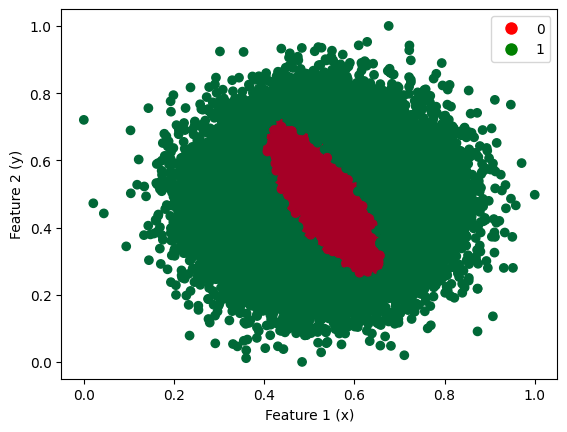

In [21]:
import matplotlib.pyplot as plt

# plot the normalized data with a legend for the colors fo the two classes, 0 and 1, make them red green respectively

plt.scatter(xtrain_normalized[:, 0], xtrain_normalized[:, 1], c=ytrain, cmap='RdYlGn')

#plt.title("Normalized Training Data")

# Add a legend

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='0', markerfacecolor='r', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='1', markerfacecolor='g', markersize=10)])


plt.xlabel("Feature 1 (x)")

plt.ylabel("Feature 2 (y)")


plt.show()


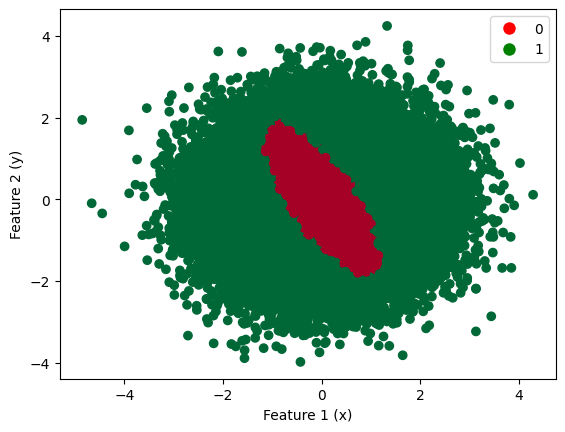

In [22]:
# do the same as above with the original data

plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, cmap='RdYlGn')

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='0', markerfacecolor='r', markersize=10),
                    
                    plt.Line2D([0], [0], marker='o', color='w', label='1', markerfacecolor='g', markersize=10)])

# add labels to the axes

plt.xlabel("Feature 1 (x)")

plt.ylabel("Feature 2 (y)")


plt.show()


### One-hot encoding

In [11]:
# convert ytrain to one-hot encoding
def one_hot_encode(data, num_cls):
    encoded_data = []
    for value in data:
        encoded_value = [0] * num_cls
        encoded_value[value] = 1
        encoded_data.append(encoded_value)
    return encoded_data

### Training

In [30]:
import random
# Set the weights to random normal values between -1 and 1 and biases to 0
w = [[random.uniform(-0.1, 0.1) for _ in range(3)] for _ in range(2)]
b = [0, 0, 0]
v = [[random.uniform(-0.1, 0.1) for _ in range(2)] for _ in range(3)]
c = [0, 0]

print(f"w: {w}")
print(f"b: {b}")
print(f"v: {v}")
print(f"c: {c}")


w: [[-0.0461046410743603, 0.09200550816003661, 0.075923465426385], [-0.060140205199530894, -0.06043971142216582, -0.021081672979417182]]
b: [0, 0, 0]
v: [[-0.008273582681143116, -0.04311652500006927], [0.09636543856857713, -0.02736346724823001], [0.04607050521284209, -0.025626834081998645]]
c: [0, 0]


In [ ]:


synth_nn = SimpleNeuralNetwork(w, b, v, c)

synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain.tolist(), num_cls), 5, learning_rate=0.1)
synth_nn = SimpleNeuralNetwork(w, b, v, c)

synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain.tolist(), num_cls), 5, learning_rate=0.01)
synth_nn = SimpleNeuralNetwork(w, b, v, c)

synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain.tolist(), num_cls), 5, learning_rate=0.001)


### Plotting training loss

In [31]:
synth_nn = SimpleNeuralNetwork(w, b, v, c)
epochs_loss = synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain.tolist(), num_cls), 100, learning_rate=0.1)

dw: [[0.0028964434717703336, 0.010294680793542257, 0.005964356601899489], [0.0026897151068511014, 0.009559916746338657, 0.005538661538238438]]
db: [0.004602762452614207, 0.016359363018814035, 0.009478008767920263]
dc: [0.5289450493672941, -0.5289450493672941]
dv: [[0.25599154952360403, -0.25599154952360403], [0.2674580850091362, -0.2674580850091362], [0.2691608548251251, -0.2691608548251251]]
Epoch 1, Average Loss: 0.6997305970529849
Epoch 2, Average Loss: 0.6607740343236017
Epoch 3, Average Loss: 0.5231049679718368
Epoch 4, Average Loss: 0.21009377014620764
Epoch 5, Average Loss: 0.11788714306089412
Epoch 6, Average Loss: 0.10966248619097269
Epoch 7, Average Loss: 0.10329518328225168
Epoch 8, Average Loss: 0.10058874959958027
Epoch 9, Average Loss: 0.09981797990809299
Epoch 10, Average Loss: 0.09852146158267537
Epoch 11, Average Loss: 0.09658105328339214
Epoch 12, Average Loss: 0.09918187050622179
Epoch 13, Average Loss: 0.09558543872637047
Epoch 14, Average Loss: 0.09895425393575501


In [ ]:
# plot nicely training loss over data points, and epochs

plt.figure(figsize=(10, 6))

for i, data_points_loss in enumerate(epochs_loss):

    # do movinga average of 10 points over the loss

    ma_loss = np.convolve(data_points_loss, np.ones(1000), 'valid') / 10
    plt.plot(ma_loss, label=f"Epoch {i + 1}")

plt.legend()

plt.title("Training Loss Over Data Points")

plt.xlabel("Data Points")

plt.ylabel("Loss")

plt.show()


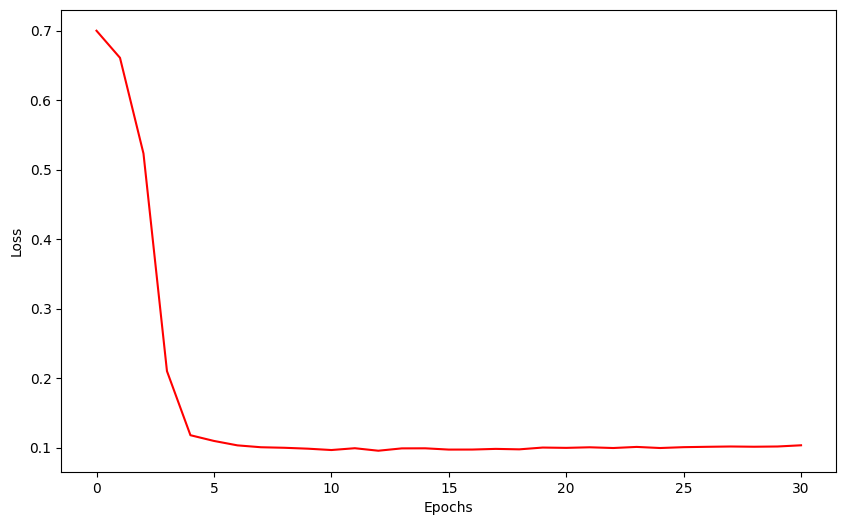

In [34]:

plt.figure(figsize=(10, 6))

# compute mean loss of all epochs

mean_loss = np.mean(epochs_loss, axis=1)[0:31]

std = np.std(epochs_loss, axis=1)

# plot the mean loss with std std as area

plt.plot(mean_loss, label="Mean Loss", color='r')

#plt.legend()

plt.xlabel("Epochs")

plt.ylabel("Loss")

plt.show()
    

In [47]:
len(ytrain_filtered.tolist())

59995

# Vectorization with MNIST data

### Data preparation

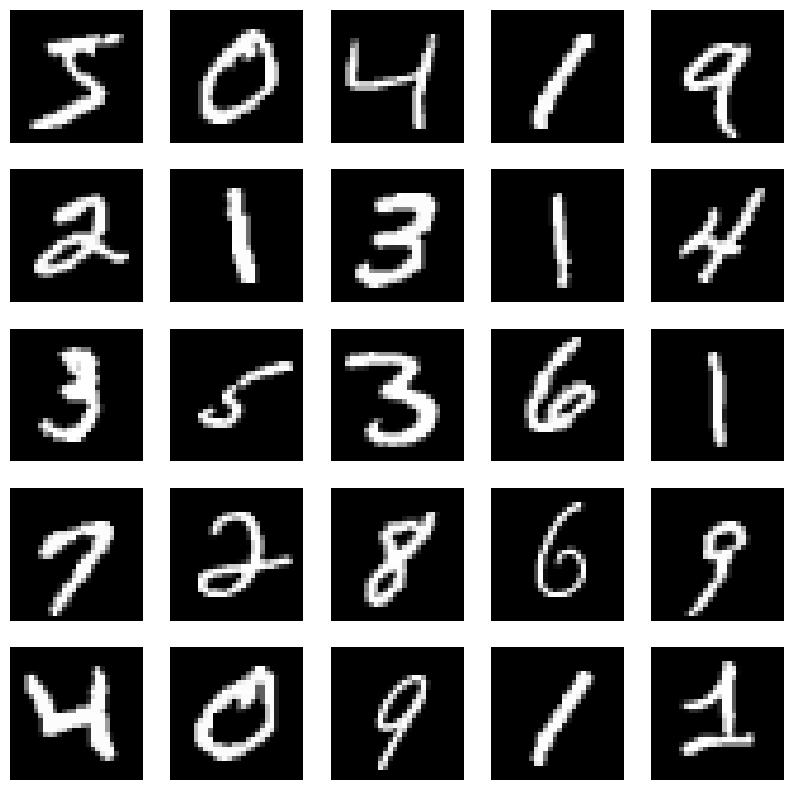

the size of the training data is:  55000
the size of the validation data is:  5000


In [3]:
import matplotlib.pyplot as plt

from data import load_mnist

# Load the MNIST dataset

(xtrain, ytrain), (xval, yval), _ = load_mnist()

# Plot the first 25 images in the training data

plt.figure(figsize=(10, 10))

for i in range(25):

    plt.subplot(5, 5, i + 1)

    plt.imshow(xtrain[i].reshape(28, 28), cmap='gray')

    plt.axis('off')

plt.show()

print("the size of the training data is: ", len(xtrain))    

print("the size of the validation data is: ", len(xval))


In [200]:
np.max(xtrain)

np.uint8(255)

(array([4932., 5678., 4968., 5101., 4859., 4506., 4951., 5175., 4842.,
        4988.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

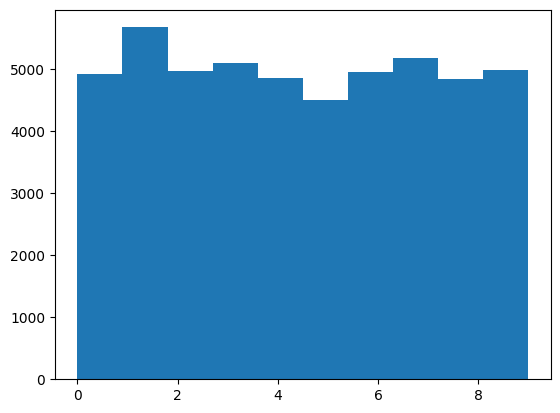

In [5]:
# plot the histogram of the training data

plt.hist(ytrain, bins=10)

(array([35257078.,   352443.,   291930.,   232012.,   240710.,   229921.,
          222252.,   178754.,   214048.,   195345.,   258655.,   202371.,
          202279.,   228087.,   243617.,   231408.,   259121.,   301071.,
          367955.,  3410943.]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <BarContainer object of 20 artists>)

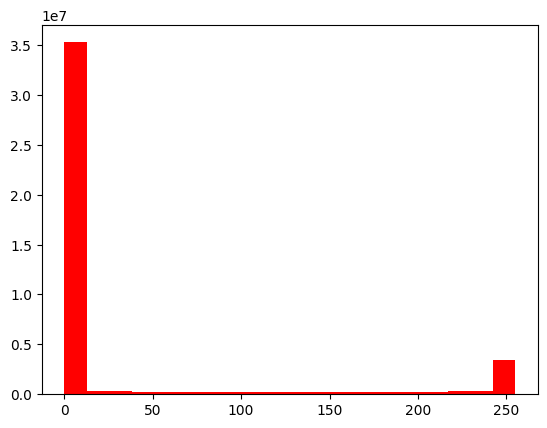

In [148]:
# plot histogram of xtrain
#plt.hist(xtrain, bins=10)

# do the same but flatten the data

plt.hist(xtrain.flatten(), bins=20, color='r')

In [ ]:
# The code below it's not necessary since by using the flag final=True you can load more data
# use the validation data as the test data and create a new validation data from the training data

# xtest = xval
# ytest = yval

# xval = xtrain[50000:]
# yval = ytrain[50000:]

# xtrain = xtrain[:50000]
# ytrain = ytrain[:50000]

# apply min max normalization to the training, validation and test data


In [6]:
import numpy as np

# min max normalization function over all features



def min_max_all(data):
    # Calculate min and max for each column (feature)
    min_vals = np.min(np.min(data, axis=1), axis=0)
    max_vals = np.max(np.max(data, axis=1), axis=0)

    # Normalize each feature
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data, min_vals, max_vals

def min_max_all_other(data, min_vals, max_vals):
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data  



In [ ]:
# try the func above with dummy data
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

normalized_data, min_vals, max_vals = min_max_all(data)

data

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
normalized_data

array([[0.   , 0.125, 0.25 ],
       [0.375, 0.5  , 0.625],
       [0.75 , 0.875, 1.   ]])

In [7]:

xtrain_normalized, min_vals, max_vals = min_max_all(xtrain)

xval_normalized = min_max_all_other(xval, min_vals, max_vals)

#xtest_normalized = min_max_all_other(xtest, min_vals, max_vals)

# convert the labels to one-hot encoding consider that the function returns a list of lists that needs to be converted to a numpy array

ytrain_encoded = np.eye(10)[ytrain]

yval_encoded = np.eye(10)[yval]

#ytest_encoded = np.eye(10)[ytest]


### Vectorized implementation

In [2]:
import numpy as np

from tqdm import tqdm


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b = np.zeros((1, hidden_size))
        self.V = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.c = np.zeros((1, output_size))

    def sigmoid(self, k):
        return 1 / (1 + np.exp(-k))

    def softmax(self, o):
        exp_o = np.exp(o - np.max(o))
        return exp_o / exp_o.sum(axis=1, keepdims=True)

    def forward(self, X):
            

        assert X.shape[1] == self.W.shape[0], "X shape mismatch"
        k = np.dot(X, self.W) + self.b
        
        
        z = self.sigmoid(k)

        assert z.shape[1] == self.V.shape[0], "z shape mismatch"
        o = np.dot(z, self.V) + self.c

        
        y = self.softmax(o)
        return k, z, o, y

    def compute_loss(self, y_true, y_pred):
        logloss = -np.sum(y_true * np.log(y_pred))
        return logloss

    def backward(self, t, y, o, z, k, X):
        dy = (-1 / y)*t
        # derivatives with tensor backpropagation # vectorize this do = [sum([dy[j] * (y[i]*(1-y[i]) if j==i else -y[j]*y[i]) for j in range(len(dy))]) for i in range(len(o)) 

        bool_t = t.astype(bool)

        do =  dy[bool_t] * (y*(1-y) *bool_t + (-y[bool_t]*y)*~bool_t)

        # derivative of loss function with respect to v
        dv = np.dot(z.T, do)

        assert dv.shape == self.V.shape, "dv shape mismatch"

        # derivative of loss function with respect to ci
        dc = do

        assert dc.shape == self.c.shape, "dc shape mismatch"

        # derivative of loss function with respect to zi
        dz = np.dot(self.V, do.T).T

        assert dz.shape == z.shape, "dz shape mismatch"

        # derivative of loss function with respect to ki
        dk = dz * z * (1 - z)

        dw = np.dot(X.T, dk)

        assert dw.shape == self.W.shape, "dw shape mismatch"

        db = dk

        return dw, db, dc, dv
    
    def update_weights(self, dw, db, dc, dv, learning_rate=0.1):

        self.W -= learning_rate * dw
        self.b -= learning_rate * db
        self.V -= learning_rate * dv
        self.c -= learning_rate * dc

    def train(self, X, y, epochs, learning_rate=0.1, validation_data=None):
        epochs_loss = []

        first_epoch_losses = []

        if validation_data:

            X_val, y_val = validation_data

            val_losses = []
        
        for epoch in tqdm(range(epochs), "epochs"):

            
            
            for X_batch, y_batch in tqdm(zip(X, y), "data points"):
                X_batch = X_batch.reshape(1, -1)
                y_batch = y_batch.reshape(1, -1)
                k, z, o, y = self.forward(X_batch)
                loss = self.compute_loss(y_batch, y)
                dw, db, dc, dv = self.backward(y_batch, y, o, z, k, X_batch)
                self.update_weights(dw, db, dc, dv, learning_rate=learning_rate)

                if epoch == 0:
                    first_epoch_losses.append(loss)
            

                

            avg_train_loss = self.validate(X, y)

            epochs_loss.append(avg_train_loss)

            if validation_data:

                val_loss = self.validate(X_val, y_val)

                val_losses.append(val_loss)

                print(f"Epoch {epoch + 1}, Validation Loss: {val_loss}")

            print(f"Epoch {epoch + 1}, Average Loss: {avg_train_loss}")

        return epochs_loss, first_epoch_losses, val_losses
            
        
    def validate(self, X, y):
        total_loss = 0
        #correct_predictions = 0

        for X_batch, y_batch in zip(X, y):
            _, _, _, y = self.forward(X_batch.reshape(1, -1))
            loss = self.compute_loss(y_batch.reshape(1,-1), y)
            

            total_loss += loss

        avg_loss = total_loss / len(X)

        return avg_loss
        


        
        
        

       


    


In [ ]:

# Example usage
nn = NeuralNetwork(input_size=784, hidden_size=300, output_size=10)

epochs_loss, first_epoch_losses = nn.train(xtrain_normalized, ytrain_encoded, 5, learning_rate=0.01)


In [30]:
xtrain_normalized[0,:].shape

(784,)

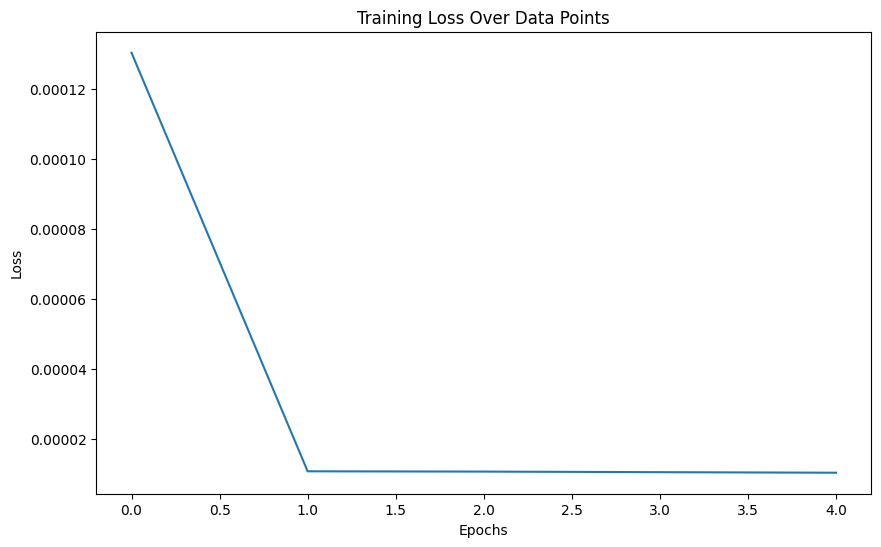

In [38]:
# plot epochs loss

plt.figure(figsize=(10, 6))

plt.plot(epochs_loss)

plt.title("Training Loss Over Data Points")

plt.xlabel("Epochs")

plt.ylabel("Loss")

plt.show()

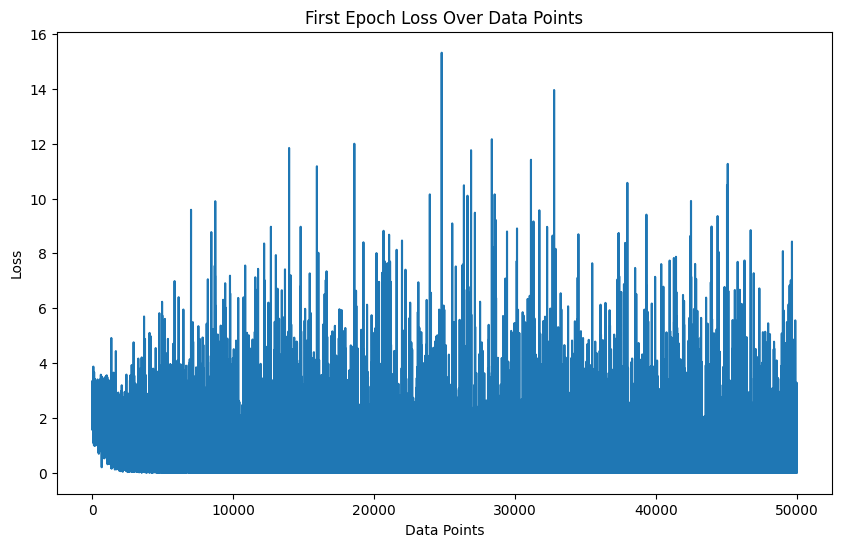

In [40]:
# plot first epoch loss

plt.figure(figsize=(10, 6))

plt.plot(first_epoch_losses)

plt.title("First Epoch Loss Over Data Points")

plt.xlabel("Data Points")

plt.ylabel("Loss")

plt.show()

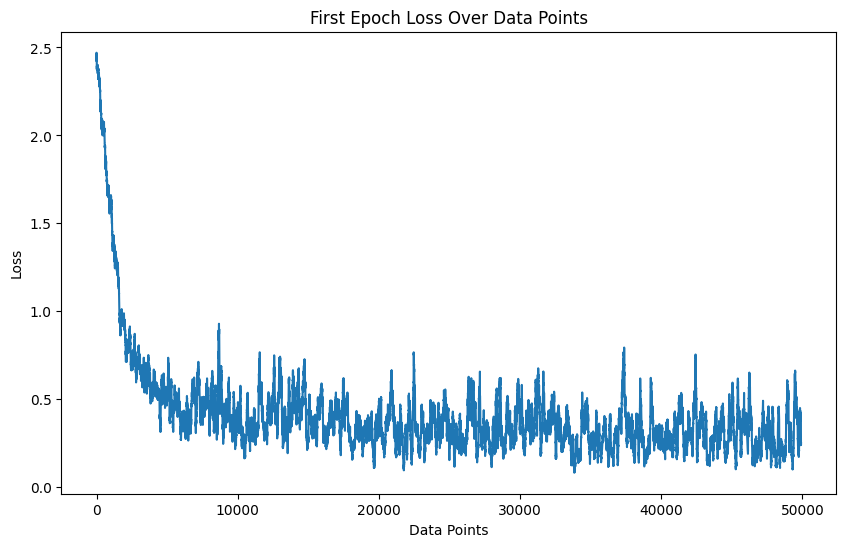

In [42]:
# plot moving average of 100 points over the first epoch loss

plt.figure(figsize=(10, 6))

ma_loss = np.convolve(first_epoch_losses, np.ones(100), 'valid') / 100

plt.plot(ma_loss)

plt.title("First Epoch Loss Over Data Points")

plt.xlabel("Data Points")

plt.ylabel("Loss")

plt.show()

## Training over batches

### Testing

In [84]:
# test matmul vs dot product

import numpy as np

dummy_data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

dummy_W = np.array([[-0.01, 0.1], [-0.1, 0.1], [0.02, 0.1]])

dummy_B = np.array([[0.1, 0.1]])



dummy_k = np.matmul(dummy_data, dummy_W) + dummy_B

dummy_z = 1 / (1 + np.exp(-dummy_k))

dummy_V = np.array([[0.1, 0.1], [0.1, 0.1]])


dummy_c = np.array([[-0.1, 0.1]])

dummy_o = np.matmul(dummy_z, dummy_V) + dummy_c

dummy_y = np.exp(dummy_o) / np.sum(np.exp(dummy_o), axis=1, keepdims=True)

dummy_t = np.array([[1, 0], [0, 1], [1, 0]])

dummy_loss = -np.sum(dummy_t * np.log(dummy_y), axis=1)




In [85]:
dy = (-1 / dummy_y)*dummy_t

In [86]:
dy

array([[-2.22140276, -0.        ],
       [-0.        , -1.81873075],
       [-2.22140276, -0.        ]])

In [89]:
bool_t

array([[ True, False],
       [False,  True],
       [ True, False]])

In [88]:
dy[bool_t]

array([-2.22140276, -1.81873075, -2.22140276])

In [87]:
bool_t = dummy_t.astype(bool)

do =  dy[bool_t].reshape(-1, 1) * (dummy_y*(1-dummy_y) *bool_t + (-dummy_y[bool_t].reshape(-1, 1)*dummy_y)*~bool_t)


In [ ]:
dummy_z.T

array([[0.4875026 , 0.66818777],
       [0.42067575, 0.83201839],
       [0.35663485, 0.92414182]])

In [47]:
dummy_z.T

array([[0.4875026 , 0.42067575, 0.35663485],
       [0.66818777, 0.83201839, 0.92414182]])

In [51]:
dummy_z[0].reshape(-1, 1)

array([[0.4875026 ],
       [0.66818777]])

In [65]:
dv_0 = np.dot(dummy_z[0].reshape(-1,1), do[0].reshape(1,-1))

In [55]:
dv_method2 = np.dot(dummy_z[0].reshape(-1,1), do[0].reshape(1,-1)) + np.dot(dummy_z[1].reshape(-1,1), do[1].reshape(1,-1)) + np.dot(dummy_z[2].reshape(-1,1), do[2].reshape(1,-1))

In [ ]:
dz = np.dot(dummy_V, do.T).T

array([[-0.27476155,  0.27476155],
       [-0.50097055,  0.50097055]])

In [60]:
dv = np.matmul(dummy_z.T, do)

In [62]:
dv = np.dot(dummy_z.T, do)

In [78]:
dc = do.sum(axis=0)

In [80]:
dc.reshape(1, -1)

array([[-0.64950199,  0.64950199]])

In [63]:
dv

array([[-0.27476155,  0.27476155],
       [-0.50097055,  0.50097055]])

In [61]:
dv

array([[-0.27476155,  0.27476155],
       [-0.50097055,  0.50097055]])

In [20]:
# test dot product

dummy_k_dot = np.dot(dummy_data, dummy_W) + dummy_B

dummy_z_dot = 1 / (1 + np.exp(-dummy_k))

dummy_o_dot = np.dot(dummy_z, dummy_V) + dummy_c

dummy_y_dot = np.exp(dummy_o) / np.sum(np.exp(dummy_o), axis=1, keepdims=True)

dummy_loss_dot = -np.sum(dummy_t * np.log(dummy_y), axis=1)



### New implementation

In [31]:
import numpy as np

from tqdm import tqdm
from sklearn.metrics import confusion_matrix


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b = np.zeros((1, hidden_size))
        self.V = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.c = np.zeros((1, output_size))

    def sigmoid(self, k):
        return 1 / (1 + np.exp(-k))

    def softmax(self, o):
        exp_o = np.exp(o - np.max(o))
        return exp_o / exp_o.sum(axis=1, keepdims=True)

    def forward(self, X):
            

        assert X.shape[1] == self.W.shape[0], "X shape mismatch"
        k = np.dot(X, self.W) + self.b
        
        
        z = self.sigmoid(k)

        assert z.shape[1] == self.V.shape[0], "z shape mismatch"
        o = np.dot(z, self.V) + self.c

        
        y = self.softmax(o)
        return k, z, o, y

    def compute_loss(self, y_true, y_pred):

        
        logloss = -np.sum(y_true * np.log(y_pred), axis=1)
        return logloss

    def backward(self, t, y, o, z, k, X):
        dy = (-1 / y)*t

        

        bool_t = t.astype(bool)

        try:

            do =  dy[bool_t].reshape(-1, 1) * (y*(1-y) *bool_t + (-y[bool_t].reshape(-1, 1)*y)*~bool_t)

        except ValueError:
            #print the shapes of the arrays

            print(f"dy shape: {dy.shape}")

            print(f"y shape: {y.shape}")

            print(f"bool_t shape: {bool_t.shape}")

            print(f"y[bool_t] shape: {y[bool_t].shape}")

            print(f"y[bool_t].reshape(-1, 1) shape: {y[bool_t].reshape(-1, 1).shape}")

            print(f"y[bool_t].reshape(-1, 1) shape: {y[bool_t].reshape(-1, 1).shape}")
            raise ValueError("Shapes mismatch")
            
        

        # derivative of loss function with respect to v
        dv = np.dot(z.T, do)

        assert dv.shape == self.V.shape, "dv shape mismatch"

        # derivative of loss function with respect to ci
        dc = do.sum(axis=0).reshape(1, -1)

        assert dc.shape == self.c.shape, "dc shape mismatch"

        # derivative of loss function with respect to zi
        dz = np.dot(self.V, do.T).T

        assert dz.shape == z.shape, "dz shape mismatch"

        # derivative of loss function with respect to ki
        dk = dz * z * (1 - z)

        dw = np.dot(X.T, dk)

        assert dw.shape == self.W.shape, "dw shape mismatch"

        db = dk.sum(axis=0).reshape(1, -1)

        return dw, db, dc, dv
    
    def update_weights(self, dw, db, dc, dv, learning_rate=0.1):

        self.W -= learning_rate * dw
        self.b -= learning_rate * db
        self.V -= learning_rate * dv
        self.c -= learning_rate * dc

    def train(self, X, y, epochs, batch_size =100, learning_rate=0.1, validation_data=None):
        epochs_loss = []

        first_epoch_losses = []

        if validation_data:
            X_val, y_val = validation_data

            avg_val_loss = []


        # shuffle the data in new arrays

        data = list(zip(X, y))
        
        for epoch in tqdm(range(epochs), "epochs"):
            
            

            np.random.shuffle(data)

            for i in range(0, len(data), batch_size):
                if i + batch_size > len(data):
                    X_batch, y_batch = zip(*data[i:])

                else:
                    
                    X_batch, y_batch = zip(*data[i:i+batch_size])

                
                X_batch = np.array(X_batch).reshape(-1, X.shape[1])
                y_batch = np.array(y_batch).reshape(-1, y.shape[1])
                k, z, o, y = self.forward(X_batch)
                loss = self.compute_loss(y_batch, y)
                dw, db, dc, dv = self.backward(y_batch, y, o, z, k, X_batch)
                self.update_weights(dw, db, dc, dv, learning_rate=learning_rate)

                if epoch == 0:
                    first_epoch_losses.append(loss.sum(axis=0)/len(X_batch))
            

            avg_train_loss = self.validate(X, y)

            if validation_data:
                avg_val_loss.append(self.validate(X_val, y_val))

            else:
                avg_val_loss = None
            epochs_loss.append(avg_train_loss)

            print(f"Epoch {epoch + 1}, Average Loss: {avg_train_loss}")

        return epochs_loss, first_epoch_losses, avg_val_loss
            
        
    def validate(self, X, y):
        total_loss = 0
        #correct_predictions = 0

        for X_batch, y_batch in zip(X, y):
            _, _, _, y = self.forward(X_batch.reshape(1, -1))
            loss = self.compute_loss(y_batch.reshape(1,-1), y)
            

            total_loss += loss

        avg_loss = total_loss / len(X)

        return avg_loss
    
    def test (self, X, y_test):
        total_loss = 0
        
        predictions = np.zeros(y_test.shape)# save  predictions to compute accuracy and confusion matrix


        for i, (X_batch, y_batch) in enumerate(zip(X, y_test)):

            _, _, _, y = self.forward(X_batch.reshape(1, -1))

            loss = self.compute_loss(y_batch.reshape(1,-1), y)

            total_loss += loss

            predictions[i] = y

        avg_loss = total_loss / len(X)

        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(y_test, axis=1)
        accuracy = np.sum(predicted_classes == true_classes) / len(y_test)

        print(f"Accuracy: {accuracy}")

        print(f"shape of predicted classes: {predicted_classes.shape}")

        print(f"shape of true classes: {true_classes.shape}")
    
        print(f"shape of y: {y.shape}")
        

        # Compute the confusion matrix
        conf_matrix = confusion_matrix(true_classes, predicted_classes)

       

        return avg_loss, predictions, accuracy, conf_matrix
        

        



    


In [26]:
predictions

NameError: name 'predictions' is not defined

In [194]:
xtrain_normalized.shape

(55000, 784)

In [199]:


# Example usage
nn = NeuralNetwork(input_size=784, hidden_size=300, output_size=10)

epochs_loss, first_epoch_losses, val_loss = nn.train(xtrain_normalized, ytrain_encoded, 5, learning_rate=0.01, batch_size=1, validation_data=(xval_normalized, yval_encoded))

epochs:  20%|██        | 1/5 [01:04<04:16, 64.07s/it]

Epoch 1, Average Loss: [0.00012425]


epochs:  40%|████      | 2/5 [02:13<03:21, 67.09s/it]

Epoch 2, Average Loss: [0.00013343]


epochs:  60%|██████    | 3/5 [03:29<02:22, 71.08s/it]

Epoch 3, Average Loss: [0.00013669]


epochs:  80%|████████  | 4/5 [04:40<01:11, 71.16s/it]

Epoch 4, Average Loss: [0.00025935]


epochs: 100%|██████████| 5/5 [05:49<00:00, 69.89s/it]

Epoch 5, Average Loss: [0.0002771]


### Plotting

In [129]:
val_loss

array([], dtype=float64)

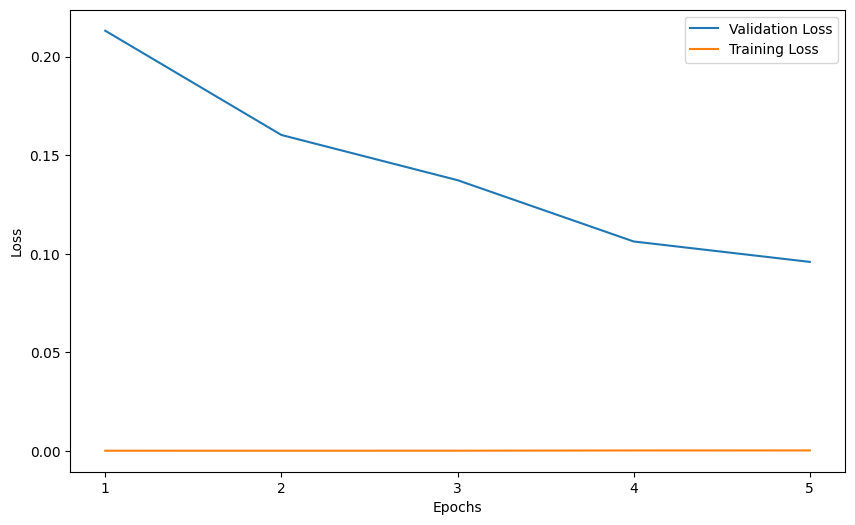

In [202]:

# plot epochs loss with validation loss

plt.figure(figsize=(10, 6))


plt.plot(val_loss, label="Validation Loss")

plt.plot(epochs_loss, label="Training Loss")

# change labels of x ticks to integers from 1 to len(epochs_loss)

plt.xticks(range(len(epochs_loss)), range(1, len(epochs_loss) + 1))

plt.xlabel("Epochs")

plt.ylabel("Loss")

plt.legend()

plt.show()



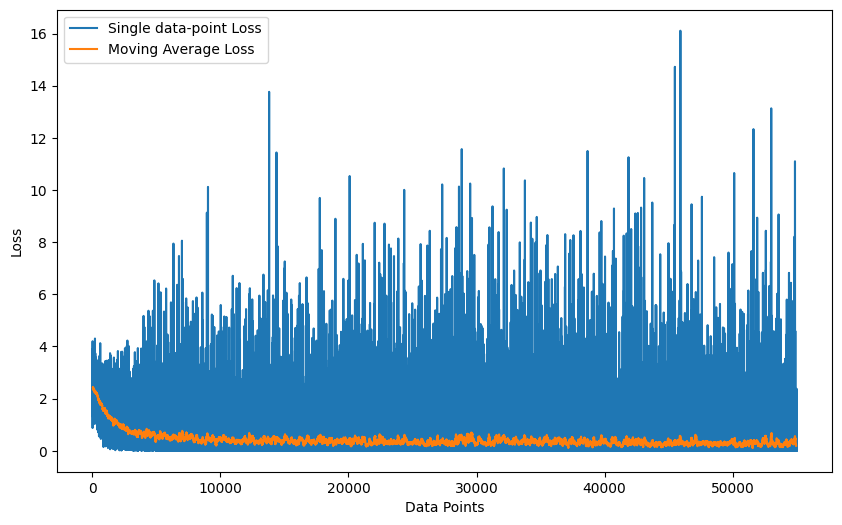

In [201]:
# plot first epoch loss and moving average of 100 points over it, translate the second plot to match the first one

plt.figure(figsize=(10, 6))

plt.plot(first_epoch_losses, label="Single data-point Loss")

conv_size = 100

ma_loss = np.convolve(first_epoch_losses, np.ones(conv_size), 'valid') / conv_size

plt.plot(np.arange(len(ma_loss))+conv_size/2, ma_loss, label="Moving Average Loss")

plt.xlabel("Data Points")

plt.ylabel("Loss")

plt.legend()

plt.show()








In [123]:
# plot validation loss

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# Analysis

In [179]:

#Train the neural network from a random initialization multiple times (at least 3) and plot an average and a standard deviation of the loss in each iteration 

n_runs = 5

epochs_losses = []

validation_losses = []  

for i in range(n_runs):
    # set the seed
    np.random.seed(i)

    nn = NeuralNetwork(input_size=784, hidden_size=300, output_size=10)

    epochs_loss, _, validation_loss = nn.train(xtrain_normalized, ytrain_encoded, 5, learning_rate=0.1, batch_size=100, validation_data=(xval_normalized, yval_encoded))



    epochs_losses.append(epochs_loss)

    validation_losses.append(validation_loss)


epochs:   0%|          | 0/5 [00:00<?, ?it/s]

epochs:  20%|██        | 1/5 [00:01<00:04,  1.14s/it]

Epoch 1, Average Loss: [0.01162936]


epochs:  40%|████      | 2/5 [00:02<00:03,  1.14s/it]

Epoch 2, Average Loss: [0.01334954]


epochs:  60%|██████    | 3/5 [00:03<00:02,  1.11s/it]

Epoch 3, Average Loss: [0.01527782]


epochs:  80%|████████  | 4/5 [00:04<00:01,  1.15s/it]

Epoch 4, Average Loss: [0.01533625]


epochs: 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


Epoch 5, Average Loss: [0.01518182]


epochs:  20%|██        | 1/5 [00:01<00:04,  1.09s/it]

Epoch 1, Average Loss: [0.00865866]


epochs:  40%|████      | 2/5 [00:02<00:03,  1.06s/it]

Epoch 2, Average Loss: [0.01088384]


epochs:  60%|██████    | 3/5 [00:03<00:02,  1.06s/it]

Epoch 3, Average Loss: [0.00956586]


epochs:  80%|████████  | 4/5 [00:04<00:01,  1.07s/it]

Epoch 4, Average Loss: [0.01289047]


epochs: 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


Epoch 5, Average Loss: [0.01162512]


epochs:  20%|██        | 1/5 [00:01<00:04,  1.07s/it]

Epoch 1, Average Loss: [0.00591713]


epochs:  40%|████      | 2/5 [00:02<00:03,  1.05s/it]

Epoch 2, Average Loss: [0.00565598]


epochs:  60%|██████    | 3/5 [00:03<00:02,  1.05s/it]

Epoch 3, Average Loss: [0.00709458]


epochs:  80%|████████  | 4/5 [00:04<00:01,  1.06s/it]

Epoch 4, Average Loss: [0.00742446]


epochs: 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


Epoch 5, Average Loss: [0.00764824]


epochs:  20%|██        | 1/5 [00:01<00:04,  1.08s/it]

Epoch 1, Average Loss: [0.00742384]


epochs:  40%|████      | 2/5 [00:02<00:03,  1.05s/it]

Epoch 2, Average Loss: [0.00766223]


epochs:  60%|██████    | 3/5 [00:03<00:02,  1.05s/it]

Epoch 3, Average Loss: [0.00802276]


epochs:  80%|████████  | 4/5 [00:04<00:01,  1.06s/it]

Epoch 4, Average Loss: [0.00828457]


epochs: 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


Epoch 5, Average Loss: [0.0088442]


epochs:  20%|██        | 1/5 [00:01<00:04,  1.07s/it]

Epoch 1, Average Loss: [0.01323975]


epochs:  40%|████      | 2/5 [00:02<00:03,  1.05s/it]

Epoch 2, Average Loss: [0.01412161]


epochs:  60%|██████    | 3/5 [00:03<00:02,  1.05s/it]

Epoch 3, Average Loss: [0.01419231]


epochs:  80%|████████  | 4/5 [00:04<00:01,  1.08s/it]

Epoch 4, Average Loss: [0.01516399]


epochs: 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]

Epoch 5, Average Loss: [0.01528699]


In [180]:
validation_losses = np.array(validation_losses)

In [176]:
validation_losses

array([[[0.39469168],
        [0.30566398],
        [0.25372437],
        [0.24249405],
        [0.22331698]],

       [[0.91947771],
        [0.61064474],
        [0.53574609],
        [0.40281367],
        [0.34620541]],

       [[1.93797618],
        [1.82369322],
        [1.50121909],
        [1.43542614],
        [1.4470562 ]],

       [[1.85115744],
        [1.6633636 ],
        [1.75769596],
        [1.18915904],
        [1.24064698]],

       [[0.41657252],
        [0.29445734],
        [0.24685617],
        [0.2408588 ],
        [0.22850829]]])

In [181]:
validation_losses.reshape(n_runs, -1)

array([[0.39469168, 0.30566398, 0.25372437, 0.24249405, 0.22331698],
       [0.91947771, 0.61064474, 0.53574609, 0.40281367, 0.34620541],
       [1.93797618, 1.82369322, 1.50121909, 1.43542614, 1.4470562 ],
       [1.85115744, 1.6633636 , 1.75769596, 1.18915904, 1.24064698],
       [0.41657252, 0.29445734, 0.24685617, 0.2408588 , 0.22850829]])

In [182]:
epochs_losses = np.array(epochs_losses)

epochs_losses.reshape(n_runs, -1)

array([[0.01162936, 0.01334954, 0.01527782, 0.01533625, 0.01518182],
       [0.00865866, 0.01088384, 0.00956586, 0.01289047, 0.01162512],
       [0.00591713, 0.00565598, 0.00709458, 0.00742446, 0.00764824],
       [0.00742384, 0.00766223, 0.00802276, 0.00828457, 0.0088442 ],
       [0.01323975, 0.01412161, 0.01419231, 0.01516399, 0.01528699]])

In [184]:
mean_train_loss = np.mean(epochs_losses, axis=0)


In [185]:
mean_train_loss

array([[0.00937375],
       [0.01033464],
       [0.01083066],
       [0.01181995],
       [0.01171727]])

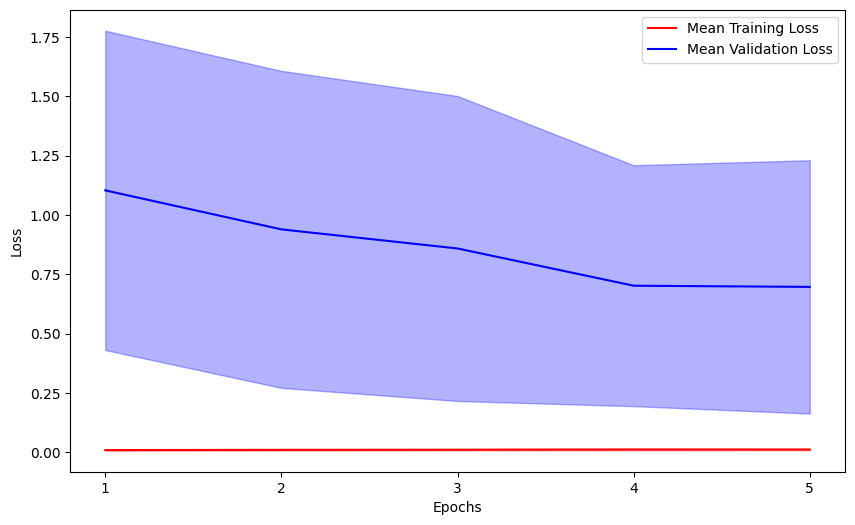

In [197]:
# plot the mean and std as area of both the training and validation loss


mean_train_loss = np.mean(epochs_losses, axis=0).reshape(-1)

std_train_loss = np.std(epochs_losses, axis=0).reshape(-1)

mean_val_loss = np.mean(validation_losses, axis=0).reshape(-1)

std_val_loss = np.std(validation_losses, axis=0).reshape(-1)

plt.figure(figsize=(10, 6))

plt.plot(mean_train_loss, label="Mean Training Loss", color='r')

plt.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, color='r', alpha=0.3)

plt.plot(mean_val_loss, label="Mean Validation Loss", color='b')

plt.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, color='b', alpha=0.3)

plt.xlabel("Epochs")

plt.ylabel("Loss")

# set the x ticks to integers from 1 to len(mean_train_loss)

plt.xticks(range(len(mean_train_loss)), range(1, len(mean_train_loss) + 1))
           
plt.legend()

plt.show()



In [25]:
ytest_encoded.shape

(10000, 10)

### Best alpha

In [16]:
#Run the SGD with different learning rates (e.g., 0.001, 0.003, 0.01, 0.03). Analyze how the learning rate value influences the final performance.

learning_rates = [0.1, 0.01, 0.001]


epochs_losses = []

validation_losses = []

# set the seed

np.random.seed(0)

for lr in learning_rates:
    nn = NeuralNetwork(input_size=784, hidden_size=300, output_size=10)

    epochs_loss, _, validation_loss = nn.train(xtrain_normalized, ytrain_encoded, 5, learning_rate=lr, batch_size= 1, validation_data=(xval_normalized, yval_encoded))

    epochs_losses.append(epochs_loss)

    validation_losses.append(validation_loss)



epochs:  20%|██        | 1/5 [01:03<04:15, 63.75s/it]

Epoch 1, Average Loss: [0.00025362]


epochs:  40%|████      | 2/5 [02:07<03:11, 63.90s/it]

Epoch 2, Average Loss: [0.00048236]


epochs:  60%|██████    | 3/5 [03:12<02:08, 64.20s/it]

Epoch 3, Average Loss: [0.00045539]


epochs:  80%|████████  | 4/5 [04:16<01:04, 64.30s/it]

Epoch 4, Average Loss: [0.00031046]


epochs: 100%|██████████| 5/5 [05:12<00:00, 62.59s/it]


Epoch 5, Average Loss: [4.61567896e-05]


epochs:  20%|██        | 1/5 [00:56<03:47, 57.00s/it]

Epoch 1, Average Loss: [9.81779856e-05]


epochs:  40%|████      | 2/5 [01:55<02:53, 57.94s/it]

Epoch 2, Average Loss: [0.00016073]


epochs:  60%|██████    | 3/5 [02:53<01:56, 58.04s/it]

Epoch 3, Average Loss: [0.00017597]


epochs:  80%|████████  | 4/5 [03:51<00:58, 58.00s/it]

Epoch 4, Average Loss: [0.00020296]


epochs: 100%|██████████| 5/5 [04:48<00:00, 57.78s/it]


Epoch 5, Average Loss: [0.00021663]


epochs:  20%|██        | 1/5 [01:06<04:24, 66.07s/it]

Epoch 1, Average Loss: [0.00010112]


epochs:  40%|████      | 2/5 [02:13<03:20, 66.83s/it]

Epoch 2, Average Loss: [0.00012925]


epochs:  60%|██████    | 3/5 [03:20<02:14, 67.16s/it]

Epoch 3, Average Loss: [9.11914675e-05]


epochs:  80%|████████  | 4/5 [04:24<01:05, 65.82s/it]

Epoch 4, Average Loss: [0.00012574]


epochs: 100%|██████████| 5/5 [05:32<00:00, 66.57s/it]

Epoch 5, Average Loss: [0.00010269]


In [17]:
epochs_losses = np.array(epochs_losses)

In [18]:
validation_losses = np.array(validation_losses)

In [19]:
validation_losses

array([[[0.11358937],
        [0.1024334 ],
        [0.08873789],
        [0.09066719],
        [0.09725269]],

       [[0.2182638 ],
        [0.16431383],
        [0.13514881],
        [0.11029482],
        [0.09591637]],

       [[0.41023608],
        [0.30574655],
        [0.27386367],
        [0.25339319],
        [0.24551118]]])

In [20]:
reshaped_epochs_losses = epochs_losses.reshape(len(learning_rates), -1)

reshaped_validation_losses = validation_losses.reshape(len(learning_rates), -1)

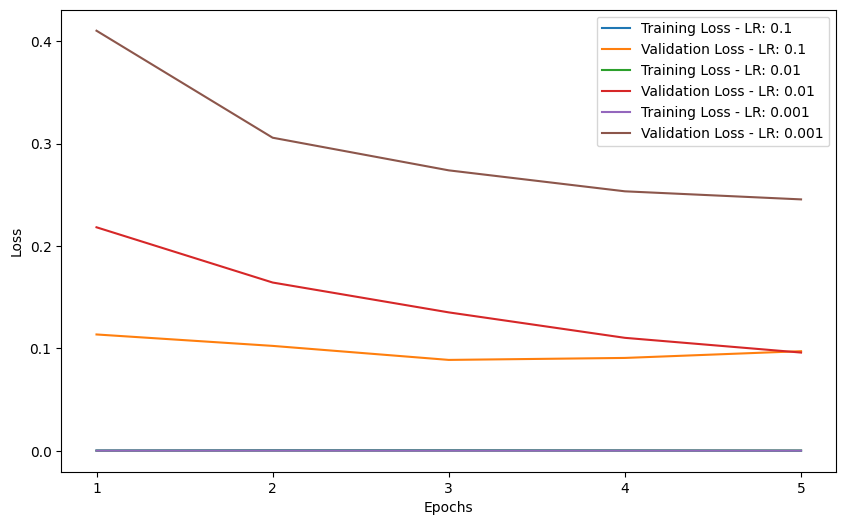

In [21]:
# plot all the training and validation losses

plt.figure(figsize=(10, 6))

for i, lr in enumerate(learning_rates):

    plt.plot(reshaped_epochs_losses[i], label=f"Training Loss - LR: {lr}")

    plt.plot(reshaped_validation_losses[i], label=f"Validation Loss - LR: {lr}")

plt.xlabel("Epochs")

plt.ylabel("Loss")

# set the x ticks to integers from 1 to len(epoch_losses.shape[1])

plt.xticks(range(reshaped_epochs_losses.shape[1]), range(1, reshaped_epochs_losses.shape[1] + 1))

plt.legend()

plt.show()




### Final test

In [32]:
# get the whole data and test the final model with the test data

from data import load_mnist

# Load the MNIST dataset

(xtrain, ytrain), (xtest, ytest), _ = load_mnist(final=True)

# Normalize the training data

xtrain_normalized, min_vals, max_vals = min_max_all(xtrain)

# Normalize the test data using the min and max values from the training data

xtest_normalized = min_max_all_other(xtest, min_vals, max_vals)

# convert the labels to one-hot encoding consider that the function returns a list of lists that needs to be converted to a numpy array

ytrain_encoded = np.eye(10)[ytrain]

ytest_encoded = np.eye(10)[ytest]

# Train the neural network on the training data

nn = NeuralNetwork(input_size=784, hidden_size=300, output_size=10)

epochs_loss, _, val_loss = nn.train(xtrain_normalized, ytrain_encoded, 5, learning_rate=0.1, batch_size=10, validation_data=(xtest_normalized, ytest_encoded))

# Test the neural network on the test data

test_loss, predictions, accuracy, conf_matrix = nn.test(xtest_normalized, ytest_encoded)

print(f"Test Loss: {test_loss}, Accuracy: {accuracy}")






epochs:  20%|██        | 1/5 [00:03<00:13,  3.41s/it]

Epoch 1, Average Loss: [0.00179484]


epochs:  40%|████      | 2/5 [00:06<00:10,  3.37s/it]

Epoch 2, Average Loss: [0.00219543]


epochs:  60%|██████    | 3/5 [00:10<00:06,  3.37s/it]

Epoch 3, Average Loss: [0.00289197]


epochs:  80%|████████  | 4/5 [00:13<00:03,  3.36s/it]

Epoch 4, Average Loss: [0.00259715]


epochs: 100%|██████████| 5/5 [00:16<00:00,  3.36s/it]

Epoch 5, Average Loss: [0.00201411]


Accuracy: 0.9771
shape of predicted classes: (10000,)
shape of true classes: (10000,)
shape of y: (1, 10)
Test Loss: [0.07935474], Accuracy: 0.9771


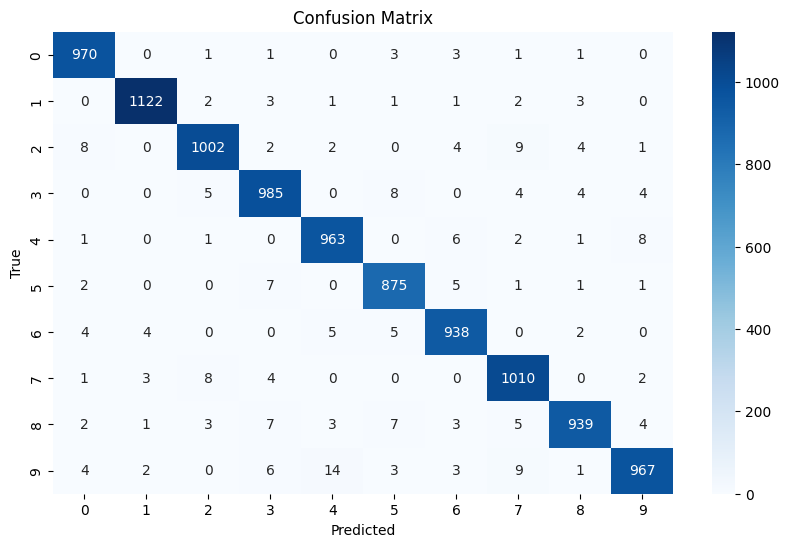

In [34]:
# plot the confusion matrix

import seaborn as sns

plt.figure(figsize=(10, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")

plt.ylabel("True")

plt.title("Confusion Matrix")

plt.show()



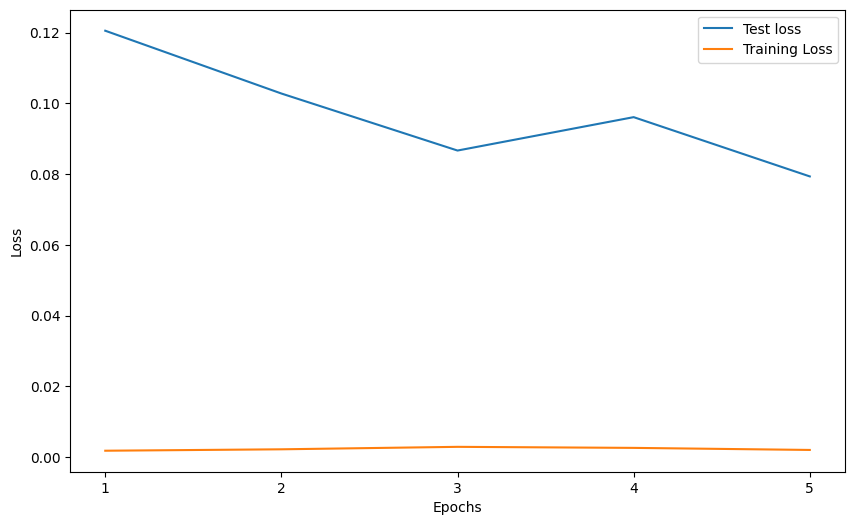

In [36]:
# plot epochs loss with validation loss

plt.figure(figsize=(10, 6))


plt.plot(val_loss, label="Test loss")

plt.plot(epochs_loss, label="Training Loss")

# change labels of x ticks to integers from 1 to len(epochs_loss)

plt.xticks(range(len(epochs_loss)), range(1, len(epochs_loss) + 1))

plt.xlabel("Epochs")

plt.ylabel("Loss")

plt.legend()

plt.show()

